## Question 3

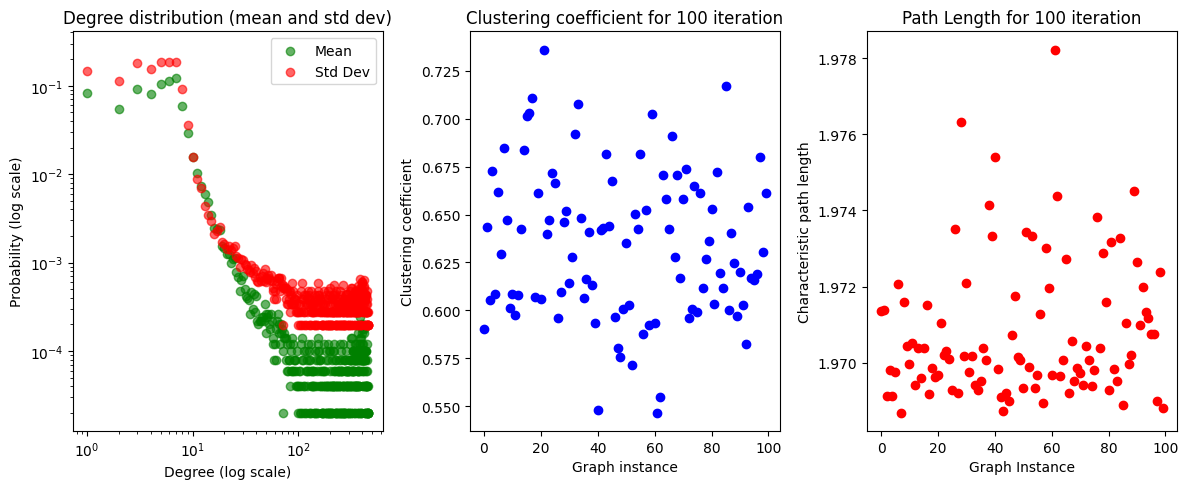

Mean clustering coeff for 100 graphs: 0.6341816309581119
Mean characteristic path length for 100 graphs: 1.9707692918366855


In [1]:
import random
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt

# function to create random graph in starting
def create_random_graph(n, p=0.5):
    graph = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                graph[i].append(j)
                graph[j].append(i)
    return graph

# BFS function to compute shortest path distances
def bfs(graph, starting, n):
    distance_list = [math.inf] * n
    visited = [0] * n
    distance_list[starting] = 0
    visited[starting] = 1
    q = deque([starting])
    while len(q) > 0:
        currentnode = q.popleft()
        for neigh in graph[currentnode]:
            if visited[neigh] == 0:
                visited[neigh] = 1
                distance_list[neigh] = distance_list[currentnode] + 1
                q.append(neigh)
    return distance_list

num_of_nodes = 500
edges = 8
iteration = 100

degree_distributions = []
clustering_coeffs = []
char_path_lengths = []

global_min_d = math.inf
global_max_d = 0

for iter in range(iteration):

    graph = create_random_graph(10)
    listofnodes = []
    for i in range(10):
        degree = len(graph[i])
        listofnodes.extend([i] * (degree ** 2))

    # Constructing the scale-free graph using squared weighting
    for i in range(10, num_of_nodes):
        new_neighbors = []
        while len(new_neighbors) < edges:
            n_choice = random.choice(listofnodes)
            if n_choice not in new_neighbors:
                new_neighbors.append(n_choice)
        graph[i] = new_neighbors
        for j in new_neighbors:
            graph[j].append(i)
        listofnodes.extend([i] * (edges ** 2))
    
        for k in new_neighbors:
            d_old = len(graph[k]) - 1  
            listofnodes.extend([k] * (2 * d_old + 1))
    
    # Compute clustering coefficient
    clusteringcoff = []
    for i in range(num_of_nodes):
        neigh = graph[i]
        degree = len(neigh)
        if degree < 2:
            clusteringcoff.append(0)
            continue
        link = 0 
        for j in neigh:
            for k in neigh:
                if j != k and j in graph[k]:
                    link += 1
        link = link // 2
        coff = (2 * link) / (degree * (degree - 1))
        clusteringcoff.append(coff)
    avg_clustering_coff = np.mean(clusteringcoff)
    clustering_coeffs.append(avg_clustering_coff)

    # Compute average path length using BFS
    tot_dist = 0
    pairs = 0
    for i in range(num_of_nodes):
        shortdist = bfs(graph, i, num_of_nodes)
        for j in range(num_of_nodes):
            if i != j and shortdist[j] != math.inf:
                tot_dist += shortdist[j]
                pairs += 1
    avg_pathlen = tot_dist / pairs if pairs > 0 else math.inf
    char_path_lengths.append(avg_pathlen)

    # Compute degree distribution
    degree_of_nodes = []
    for node in graph:
        degree_of_nodes.append(len(graph[node]))
    
    # Update global min and max degrees
    current_min = min(degree_of_nodes)
    current_max = max(degree_of_nodes)
    if current_min < global_min_d:
        global_min_d = current_min
    if current_max > global_max_d:
        global_max_d = current_max
    
    num_bins = current_max - current_min + 1
    total_d = [0] * num_bins
    for d in degree_of_nodes:
        total_d[d - current_min] += 1
    total_n = len(degree_of_nodes)
    degree_dist = []
    for c in total_d:
        prob = c / total_n
        degree_dist.append(prob)
    degree_distributions.append(degree_dist)

# Padding the degree distributions so that all have the same length
max_length = 0
for d in degree_distributions:
    if len(d) > max_length:
        max_length = len(d)

degree_distributions_padded = []
for d in degree_distributions:
    padding_length = max_length - len(d)
    padded_d = d + [0] * padding_length
    degree_distributions_padded.append(padded_d)

degree_distributions = np.array(degree_distributions_padded)

# Compute mean and standard deviation of the degree distributions
degree_mean = np.mean(degree_distributions, axis=0)
degree_std = np.std(degree_distributions, axis=0)
degree_values = np.arange(global_min_d, global_min_d + len(degree_mean))

plt.figure(figsize=(12, 5))
# Plot degree distribution with standard deviation
plt.subplot(1, 3, 1)
plt.scatter(degree_values, degree_mean, color='green', label='Mean', alpha=0.6)
plt.scatter(degree_values, degree_std, color='red', label='Std Dev', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.title('Degree distribution (mean and std dev)')
plt.legend()

# Plot clustering coefficient for 100 runs
plt.subplot(1, 3, 2)
plt.plot(range(iteration), clustering_coeffs, marker='o', linestyle='', color='blue')
plt.xlabel('Graph instance')
plt.ylabel('Clustering coefficient')
plt.title('Clustering coefficient for 100 iteration')

# Plot characteristic path length for 100 runs
plt.subplot(1, 3, 3)
plt.plot(range(iteration), char_path_lengths, marker='o', linestyle='', color='red')
plt.xlabel('Graph Instance')
plt.ylabel('Characteristic path length')
plt.title('Path Length for 100 iteration')

plt.tight_layout()
plt.show()

print("Mean clustering coeff for 100 graphs:", np.mean(clustering_coeffs))
print("Mean characteristic path length for 100 graphs:", np.mean(char_path_lengths))


Comparision betweent the BA algorithm and the modified BA algorithm 
1) The clustering coffiecient in the BA algorithm is not so high meaning they dont have larger values indicating a little less connectivity between the nodes it is not like real world scale free becuase in real world we have more biases then just the probabilty we are taking in account here but in the modified BA algorithm, where the probability of a new node getting connected to another node is proportional to square of its degree , the values of clustering coffiecient is  too large suggesting that the network is highly connected which I think is expected as in modiied algorithm we increased the bias even more so the hubs will be even denser , the new nodes will tend to  connect to the hubs even more then the BA algorithm forming an even dense network increasing clustering ccoffiecent somehow it reassembles the real world scale free network.
2) Path length in the BA algorithm is  like  any real world scale free network it is less then 3 for my graph  as number of nodes is less but i think if we take large number of nodes it will go upto 5 or 6 , that is six degree of separation.But in the Modified BA algorithm the path lenght is much less it is less then 2 for the same nymber of nodes as the real BA algorithm that i used in q2, which is again as we should expect as in this question the network will be so dense so the average path length will obviously decrease , as the most of the nodes will be connected to hubs.
3) The degree distribution in the BA algoritm is just like a real world network , we have some hubs having large degree with some possible probability , but  we have outliers also with less degree but in the modified BA most of the nodes are hubs or part of hubs so most of them have a large degree which is not like real world , and nodes having small degree is pretty much less, the standard deviation is also more in this case because the modified BA can create a more extreme distriution.

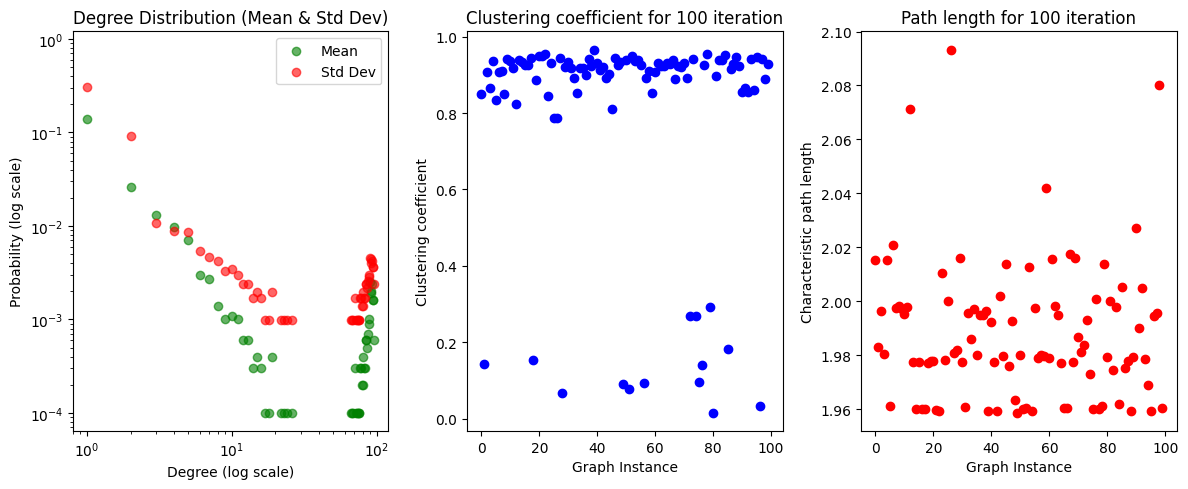

Mean clustering coefficient for 100 graphs: 0.8027515550988349
Mean characteristic path length for 100 graphs: 1.987680725623583


In [2]:
import random
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt

# function to create random graph in starting
def create_random_graph(n, p=0.5):
    graph = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                graph[i].append(j)
                graph[j].append(i)
    return graph

# BFS function to compute shortest path distances
def bfs(graph, starting, n):
    distance_list = [math.inf] * n
    visited = [0] * n
    distance_list[starting] = 0
    visited[starting] = 1
    q = deque([starting])
    while len(q) > 0:
        currentnode = q.popleft()
        for neigh in graph[currentnode]:
            if visited[neigh] == 0:
                visited[neigh] = 1
                distance_list[neigh] = distance_list[currentnode] + 1
                q.append(neigh)
    return distance_list

num_of_nodes = 100
edges = 2
iteration = 100

degree_distributions = []
clustering_coeffs = []
char_path_lengths = []

global_min_d = math.inf
global_max_d = 0

for iter in range(iteration):

    graph = create_random_graph(10)
    
    listofnodes = []
    for i in range(10):
        degree = len(graph[i])
        listofnodes.extend([i] * (degree ** 4))

    # Constructing the scale-free graph for power 4
    for i in range(10, num_of_nodes):
        new_neighbors = []
        while len(new_neighbors) < edges:
            n_choice = random.choice(listofnodes)
            if n_choice not in new_neighbors:
                new_neighbors.append(n_choice)
        graph[i] = new_neighbors
        for j in new_neighbors:
            graph[j].append(i)
        listofnodes.extend([i] * (edges ** 4))
        for k in new_neighbors:
            d_old = len(graph[k]) - 1 
            increment = 4 * (d_old ** 3) + 6 * (d_old ** 2) + 4 * d_old + 1
            listofnodes.extend([k] * increment)
    
    # Compute clustering coefficient
    clusteringcoff = []
    for i in range(num_of_nodes):
        neigh = graph[i]
        degree = len(neigh)
        if degree < 2:
            clusteringcoff.append(0)
            continue
        link = 0 
        for j in neigh:
            for k in neigh:
                if j != k and j in graph[k]:
                    link += 1
        link = link // 2
        coff = (2 * link) / (degree * (degree - 1))
        clusteringcoff.append(coff)
    avg_clustering_coff = np.mean(clusteringcoff)
    clustering_coeffs.append(avg_clustering_coff)

    # Compute average path length using BFS
    tot_dist = 0
    pairs = 0
    for i in range(num_of_nodes):
        dists = bfs(graph, i, num_of_nodes)
        for j in range(num_of_nodes):
            if i != j and dists[j] != math.inf:
                tot_dist += dists[j]
                pairs += 1
    avg_pathlen = tot_dist / pairs if pairs > 0 else math.inf
    char_path_lengths.append(avg_pathlen)

    # Compute degree distribution
    degree_of_nodes = []
    for node in graph:
        degree_of_nodes.append(len(graph[node]))
    
    # Update global min and max degrees
    current_min = min(degree_of_nodes)
    current_max = max(degree_of_nodes)
    if current_min < global_min_d:
        global_min_d = current_min
    if current_max > global_max_d:
        global_max_d = current_max
    
    num_bins = current_max - current_min + 1
    total_d = [0] * num_bins
    for d in degree_of_nodes:
        total_d[d - current_min] += 1
    total_n = len(degree_of_nodes)
    degree_dist = [c / total_n for c in total_d]
    degree_distributions.append(degree_dist)

# Padding the degree distributions so that all have the same length
max_length = 0
for d in degree_distributions:
    if len(d) > max_length:
        max_length = len(d)

degree_distributions_padded = []
for d in degree_distributions:
    padding_length = max_length - len(d)
    padded_d = d + [0] * padding_length
    degree_distributions_padded.append(padded_d)

degree_distributions = np.array(degree_distributions_padded)

# Compute mean and standard deviation of the degree distributions
degree_mean = np.mean(degree_distributions, axis=0)
degree_std = np.std(degree_distributions, axis=0)
degree_values = np.arange(global_min_d, global_min_d + len(degree_mean))

plt.figure(figsize=(12, 5))
# Plot degree distribution with standard dev
plt.subplot(1, 3, 1)
plt.scatter(degree_values, degree_mean, color='green', label='Mean', alpha=0.6)
plt.scatter(degree_values, degree_std, color='red', label='Std Dev', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Probability (log scale)')
plt.title('Degree Distribution (Mean & Std Dev)')
plt.legend()

# Plot clustering coefficient for 100 iteration
plt.subplot(1, 3, 2)
plt.plot(range(iteration), clustering_coeffs, marker='o', linestyle='', color='blue')
plt.xlabel('Graph Instance')
plt.ylabel('Clustering coefficient')
plt.title('Clustering coefficient for 100 iteration')

# Plot characteristic path length for 100 iteration
plt.subplot(1, 3, 3)
plt.plot(range(iteration), char_path_lengths, marker='o', linestyle='', color='red')
plt.xlabel('Graph Instance')
plt.ylabel('Characteristic path length')
plt.title('Path length for 100 iteration')

plt.tight_layout()
plt.show()

print("Mean clustering coefficient for 100 graphs:", np.mean(clustering_coeffs))
print("Mean characteristic path length for 100 graphs:", np.mean(char_path_lengths))


Here i have modified the BA algorithm for  power 4 Here the bias is even more then power 2 , before I was running the code for 500 nodes but here i have ran the code for only 100 nodes and only 2 edges as i was getting memory overflow for large number of nodes in this question because the preferential attachment list grows extremely fast when using power 4 weighting , so we can not compare it directly with q2 or q3 first part but stil we can see that most of the nodes have high degree , most of the nodes have clustering coffiecient equal to 1 , path lenght is so small even after having only 2 edges.